<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## Problem Statement

Many high school students know which college they’d like to consider, but rarely know whether to take the SAT or ACT when applying to these colleges or many just choose to default to the exam their school offers. We will explore the participation rates and average ACT and SAT scores broken down by region.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math totaling 154 questions with an alotted 180 minutes to complete and a score range of 1 to 36 ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science totaling 215 questions with an alotted 175 minutes to complete and a score range of 400 to 1600 ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites:
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

### ACT and SAT Datasets

Below, you will find the average ACT and SAT scores by state in 2017, 2018, and 2019. In addition, you will find the average section scores for each exam by state. 

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

In [29]:
def the_mean(x):
    return sum(x)/ len(x)

the_mean([1,2,3,4])

2.5

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

In [30]:
def the_std(x):
    mean = sum(x)/len(x)
    variance = sum((i - mean)**2 for i in x)/ len(x)
    std_dev = variance**.5
    return std_dev

the_std([1,2,3,4])

1.118033988749895

3. Data cleaning function (percent to float):

In [31]:
def per_to_dec(x):
    y = float(x.strip('%'))/100
    return y

per_to_dec('90%')

0.9

--- 
# Part 2

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import statistics

## Data Import and Cleaning

In [33]:
def fix_composite(x):
    y = x.strip('x')
    return y

In [34]:
act_17 = pd.read_csv('/Users/nicky/Desktop/Data Science/Projects/Project1/data/act_2017.csv')
act_17_column = {'Participation': "17_act_part", 'Composite': "17_act_comp"}
act_17 = act_17.rename(columns=act_17_column)
act_17["17_act_comp"] = act_17["17_act_comp"].apply(fix_composite)
act_17["17_act_comp"] = act_17["17_act_comp"].astype(float)
act_17["17_act_part"] = act_17["17_act_part"].apply(per_to_dec)
act_17 = act_17[act_17['State'] != 'National'] 
act_17['17_act_std'] = (act_17['17_act_comp']- 21.519608)/2.020695
act_17.head()

,State,17_act_part,English,Math,Reading,Science,17_act_comp,17_act_std
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,-1.147926
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,-0.850998
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,-0.900486
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,-1.048950
5,California,0.31,22.5,22.7,23.1,22.2,22.8,0.633639


In [35]:
act_17.describe()

,17_act_part,English,Math,Reading,Science,17_act_comp,17_act_std
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01
mean,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608,-7.762812e-08
std,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695,9.999999e-01
min,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,-1.840757e+00
25%,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,-8.509983e-01
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,-5.919152e-02
75%,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,1.029543e+00
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.969813e+00


In [36]:
sat_17 = pd.read_csv('/Users/nicky/Desktop/Data Science/Projects/Project1/data/sat_2017.csv')
sat_17_column = {'Participation': "17_sat_part",'Total': "17_sat_tot"}
sat_17 = sat_17.rename(columns=sat_17_column)
sat_17["17_sat_part"] = sat_17["17_sat_part"].apply(per_to_dec)
sat_17['17_sat_std'] = (sat_17['17_sat_tot']- 1126.098039)/92.494812
sat_17.head()

,State,17_sat_part,Evidence-Based Reading and Writing,Math,17_sat_tot,17_sat_std
0,Alabama,0.05,593,572,1165,0.420585
1,Alaska,0.38,547,533,1080,-0.498385
2,Arizona,0.30,563,553,1116,-0.109174
3,Arkansas,0.03,614,594,1208,0.885476
4,California,0.53,531,524,1055,-0.768671


In [37]:
sat_17.describe()

,17_sat_part,Evidence-Based Reading and Writing,Math,17_sat_tot,17_sat_std
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01
mean,0.398039,569.117647,547.627451,1126.098039,2.331875e-09
std,0.352766,45.666901,84.909119,92.494812,1.000000e+00
min,0.020000,482.000000,52.000000,950.000000,-1.903869e+00
25%,0.040000,533.500000,522.000000,1055.500000,-7.632649e-01
50%,0.380000,559.000000,548.000000,1107.000000,-2.064769e-01
75%,0.660000,613.000000,599.000000,1212.000000,9.287219e-01
max,1.000000,644.000000,651.000000,1295.000000,1.826070e+00


In [38]:
act_sat_17 = pd.merge(left=act_17,right=sat_17,on='State')
act_sat_17 = act_sat_17.set_index("State")
act_sat_17 = act_sat_17.drop(columns=['Evidence-Based Reading and Writing','English','Math_x', 'Math_y','Reading','Science'])
act_sat_17.head()

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
State,,,,,,
Alabama,1.00,19.2,-1.147926,0.05,1165,0.420585
Alaska,0.65,19.8,-0.850998,0.38,1080,-0.498385
Arizona,0.62,19.7,-0.900486,0.30,1116,-0.109174
Arkansas,1.00,19.4,-1.048950,0.03,1208,0.885476
California,0.31,22.8,0.633639,0.53,1055,-0.768671


In [39]:
act_sat_17.dtypes

17_act_part    float64
17_act_comp    float64
17_act_std     float64
17_sat_part    float64
17_sat_tot       int64
17_sat_std     float64
dtype: object

In [40]:
act_sat_17.to_csv("act_sat_17.csv")

In [41]:
act_18 = pd.read_csv('/Users/nicky/Desktop/Data Science/Projects/Project1/data/act_2018.csv')
act_18_column = {'Participation': "18_act_part", 'Composite': "18_act_comp"}
act_18 = act_18.rename(columns=act_18_column)
act_18['State'] = act_18['State'].replace('District of columbia', 'District of Columbia')
act_18["18_act_part"] = act_18["18_act_part"].apply(per_to_dec)
act_18 = act_18[act_18['State'] != 'National'] 
act_18 = act_18.drop(act_18.index[20])
act_18['18_act_std'] = (act_18['18_act_comp']- 21.496078)/2.111583
act_18.head()

,State,18_act_part,18_act_comp,18_act_std
0,Alabama,1.00,19.1,-1.134731
1,Alaska,0.33,20.8,-0.329647
2,Arizona,0.66,19.2,-1.087373
3,Arkansas,1.00,19.4,-0.992657
4,California,0.27,22.7,0.570151


In [42]:
act_18.describe()

,18_act_part,18_act_comp,18_act_std
count,51.000000,51.000000,5.100000e+01
mean,0.617255,21.496078,2.042887e-07
std,0.340371,2.111583,1.000000e+00
min,0.070000,17.700000,-1.797740e+00
25%,0.285000,19.950000,-7.321891e-01
50%,0.660000,21.300000,-9.285830e-02
75%,1.000000,23.650000,1.020051e+00
max,1.000000,25.600000,1.943529e+00


In [43]:
sat_18 = pd.read_csv('/Users/nicky/Desktop/Data Science/Projects/Project1/data/sat_2018.csv')
sat_18_column = {'Participation': "18_sat_part",'Total': "18_sat_tot"}
sat_18 = sat_18.rename(columns=sat_18_column)
sat_18["18_sat_part"] = sat_18["18_sat_part"].apply(per_to_dec)
sat_18['18_sat_std'] = (sat_18['18_sat_tot']- 1120.019608)/94.155083
sat_18.head()

,State,18_sat_part,Evidence-Based Reading and Writing,Math,18_sat_tot,18_sat_std
0,Alabama,0.06,595,571,1166,0.488347
1,Alaska,0.43,562,544,1106,-0.148899
2,Arizona,0.29,577,572,1149,0.307794
3,Arkansas,0.05,592,576,1169,0.520210
4,California,0.60,540,536,1076,-0.467522


In [44]:
sat_18.describe()

,18_sat_part,Evidence-Based Reading and Writing,Math,18_sat_tot,18_sat_std
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01
mean,0.457451,563.686275,556.235294,1120.019608,-1.666005e-09
std,0.373143,47.502627,47.772623,94.155083,1.000000e+00
min,0.020000,480.000000,480.000000,977.000000,-1.518979e+00
25%,0.045000,534.500000,522.500000,1057.500000,-6.640067e-01
50%,0.520000,552.000000,544.000000,1098.000000,-2.338653e-01
75%,0.775000,610.500000,593.500000,1204.000000,8.919369e-01
max,1.000000,643.000000,655.000000,1298.000000,1.890290e+00


In [45]:
act_sat_18 = pd.merge(left=act_18,right=sat_18,on='State')
act_sat_18 = act_sat_18.set_index("State")
act_sat_18 = act_sat_18.drop(columns=['Evidence-Based Reading and Writing','Math'])
act_sat_18.head()

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
State,,,,,,
Alabama,1.00,19.1,-1.134731,0.06,1166,0.488347
Alaska,0.33,20.8,-0.329647,0.43,1106,-0.148899
Arizona,0.66,19.2,-1.087373,0.29,1149,0.307794
Arkansas,1.00,19.4,-0.992657,0.05,1169,0.520210
California,0.27,22.7,0.570151,0.60,1076,-0.467522


In [46]:
act_sat_18.dtypes

18_act_part    float64
18_act_comp    float64
18_act_std     float64
18_sat_part    float64
18_sat_tot       int64
18_sat_std     float64
dtype: object

In [47]:
act_sat_18.to_csv("act_sat_18.csv")

In [48]:
act_19 = pd.read_csv('/Users/nicky/Desktop/Data Science/Projects/Project1/data/act_2019.csv')
act_19_column = {'Participation': "19_act_part", 'Composite': "19_act_comp"}
act_19 = act_19.rename(columns=act_19_column)
act_19["19_act_part"] = act_19["19_act_part"].apply(per_to_dec)
act_19 = act_19[act_19['State'] != 'National'] 
act_19['19_act_std'] = (act_19['19_act_comp']- 21.464706)/2.194523
act_19.head()

,State,19_act_part,19_act_comp,19_act_std
0,Alabama,1.00,18.9,-1.168685
1,Alaska,0.38,20.1,-0.621869
2,Arizona,0.73,19.0,-1.123117
3,Arkansas,1.00,19.3,-0.986413
4,California,0.23,22.6,0.517331


In [49]:
act_19.describe()

,19_act_part,19_act_comp,19_act_std
count,51.000000,51.000000,5.100000e+01
mean,0.586667,21.464706,-5.360940e-08
std,0.345159,2.194523,9.999998e-01
min,0.060000,17.900000,-1.624365e+00
25%,0.245000,19.800000,-7.585730e-01
50%,0.540000,21.100000,-1.661892e-01
75%,1.000000,23.700000,1.018579e+00
max,1.000000,25.500000,1.838802e+00


In [50]:
sat_19 = pd.read_csv('/Users/nicky/Desktop/Data Science/Projects/Project1/data/sat_2019.csv')
sat_19['Participation Rate'] = sat_19['Participation Rate'].replace("—",np.nan)
sat_19.dropna(inplace=True)
sat_19_column = {'Participation Rate': "19_sat_part",'Total': "19_sat_tot"}
sat_19 = sat_19.rename(columns=sat_19_column)
sat_19["19_sat_part"] = sat_19["19_sat_part"].apply(per_to_dec)
sat_19['19_sat_std'] = (sat_19['19_sat_tot']- 1113.078431)/97.197910
sat_19.head()

,State,19_sat_part,EBRW,Math,19_sat_tot,19_sat_std
0,Alabama,0.07,583,560,1143,0.307842
1,Alaska,0.41,556,541,1097,-0.165420
2,Arizona,0.31,569,565,1134,0.215247
3,Arkansas,0.06,582,559,1141,0.287265
4,California,0.63,534,531,1065,-0.494645


In [51]:
sat_19.describe()

,19_sat_part,EBRW,Math,19_sat_tot,19_sat_std
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01
mean,0.490588,560.803922,552.196078,1113.078431,3.832892e-09
std,0.387476,46.248035,51.290553,97.197910,1.000000e+00
min,0.020000,483.000000,460.000000,943.000000,-1.749816e+00
25%,0.055000,527.500000,511.500000,1038.000000,-7.724285e-01
50%,0.540000,550.000000,546.000000,1097.000000,-1.654195e-01
75%,0.820000,612.000000,599.000000,1210.000000,9.971569e-01
max,1.000000,636.000000,648.000000,1284.000000,1.758490e+00


In [52]:
act_sat_19 = pd.merge(left=act_19,right=sat_19,on='State')
act_sat_19 = act_sat_19.set_index("State")
act_sat_19 = act_sat_19.drop(columns=['EBRW','Math'])
act_sat_19.head()

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
State,,,,,,
Alabama,1.00,18.9,-1.168685,0.07,1143,0.307842
Alaska,0.38,20.1,-0.621869,0.41,1097,-0.165420
Arizona,0.73,19.0,-1.123117,0.31,1134,0.215247
Arkansas,1.00,19.3,-0.986413,0.06,1141,0.287265
California,0.23,22.6,0.517331,0.63,1065,-0.494645


In [53]:
act_sat_19.dtypes

19_act_part    float64
19_act_comp    float64
19_act_std     float64
19_sat_part    float64
19_sat_tot       int64
19_sat_std     float64
dtype: object

In [54]:
act_sat_19.to_csv("act_sat_19.csv")

In [55]:
combined_yoy_act_sat = pd.merge(pd.merge(act_sat_17,act_sat_18,on='State'),act_sat_19,on='State')
combined_yoy_act_sat.head()

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
State,,,,,,,,,,,,,,,,,,
Alabama,1.00,19.2,-1.147926,0.05,1165,0.420585,1.00,19.1,-1.134731,0.06,1166,0.488347,1.00,18.9,-1.168685,0.07,1143,0.307842
Alaska,0.65,19.8,-0.850998,0.38,1080,-0.498385,0.33,20.8,-0.329647,0.43,1106,-0.148899,0.38,20.1,-0.621869,0.41,1097,-0.165420
Arizona,0.62,19.7,-0.900486,0.30,1116,-0.109174,0.66,19.2,-1.087373,0.29,1149,0.307794,0.73,19.0,-1.123117,0.31,1134,0.215247
Arkansas,1.00,19.4,-1.048950,0.03,1208,0.885476,1.00,19.4,-0.992657,0.05,1169,0.520210,1.00,19.3,-0.986413,0.06,1141,0.287265
California,0.31,22.8,0.633639,0.53,1055,-0.768671,0.27,22.7,0.570151,0.60,1076,-0.467522,0.23,22.6,0.517331,0.63,1065,-0.494645


In [56]:
combined_yoy_act_sat.to_csv("./combined_yoy_act_sat.csv")

### Data Dictionary

|Feature|Type|Datasets|Description|
|---|---|---|---|
|**act_part**|*float*|act_sat_17 & act_sat_18 & act_sat_19|Participation rates for ACT by state| 
|**act_comp**|*float*|act_sat_17 & act_sat_18 & act_sat_19|Average composite score for ACT by state| 
|**sat_part**|*float*|act_sat_17 & act_sat_18 & act_sat_19|Participation rates for SAT by state| 
|**sat_tot**|*integer*|act_sat_17 & act_sat_18 & act_sat_19|Average composite score for SAT by state| 

## Exploratory Data Analysis

In [57]:
total_act_part = (act_sat_17['17_act_part'].mean() + act_sat_18['18_act_part'].mean() + act_sat_19['19_act_part'].mean())/3
total_act_part

0.6188235294117647

Average mean of all ACT participation between 2017 and 2019

In [58]:
total_act_comp = (act_sat_17['17_act_comp'] + act_sat_18['18_act_comp'] + act_sat_19['19_act_comp'])/3
total_act_comp.describe()

count    51.000000
mean     21.493464
std       2.078130
min      17.800000
25%      19.966667
50%      21.400000
75%      23.400000
max      25.466667
dtype: float64

Average mean of all ACT composite scores between 2017 and 2019

In [59]:
total_act_std = (act_sat_17['17_act_std'] + act_sat_18['18_act_std'] + act_sat_19['19_act_std'])/3
total_act_std

State
Alabama                -1.150447
Alaska                 -0.600838
Arizona                -1.036992
Arkansas               -1.009340
California              0.573707
Colorado                0.615491
Connecticut             1.867894
Delaware                1.189640
District of Columbia    1.083428
Florida                -0.742912
Georgia                -0.044726
Hawaii                 -1.199822
Idaho                   0.412894
Illinois                0.790413
Indiana                 0.493954
Iowa                    0.131277
Kansas                  0.005955
Kentucky               -0.708130
Louisiana              -1.100363
Maine                   1.284583
Maryland                0.628535
Massachusetts           1.885100
Michigan                1.298352
Minnesota              -0.044016
Mississippi            -1.404299
Missouri               -0.521825
Montana                -0.690214
Nebraska               -0.462594
Nevada                 -1.754287
New Hampshire           1.762505
New 

Average standard deviation for ACT composite scores between 2017 and 2019

In [60]:
total_sat_part = (act_sat_17['17_sat_part'].mean() + act_sat_18['18_sat_part'].mean() + act_sat_19['19_sat_part'].mean())/3
total_sat_part

0.4486928104575163

Average mean of all SAT participation between 2017 and 2019

In [61]:
tot_sat_part = (act_sat_17['17_sat_part'] + act_sat_18['18_sat_part'] + act_sat_19['19_sat_part'])/3
tot_sat_part

State
Alabama                 0.060000
Alaska                  0.406667
Arizona                 0.300000
Arkansas                0.046667
California              0.586667
Colorado                0.703333
Connecticut             1.000000
Delaware                1.000000
District of Columbia    0.953333
Florida                 0.796667
Georgia                 0.673333
Hawaii                  0.550000
Idaho                   0.976667
Illinois                0.693333
Indiana                 0.640000
Iowa                    0.026667
Kansas                  0.040000
Kentucky                0.040000
Louisiana               0.043333
Maine                   0.976667
Maryland                0.756667
Massachusetts           0.790000
Michigan                1.000000
Minnesota               0.036667
Mississippi             0.026667
Missouri                0.036667
Montana                 0.096667
Nebraska                0.030000
Nevada                  0.230000
New Hampshire           0.956667
New 

Average standard deviation for SAT composite scores between 2017 and 2019

In [62]:
avg_sat_tot = (act_sat_17['17_sat_tot'].mean() + act_sat_18['18_sat_tot'].mean() + act_sat_19['19_sat_tot'].mean())/3
avg_sat_tot

1119.7320261437908

Average mean of all SAT scores between 2017 and 2019

In [63]:
sat_tot = (act_sat_17['17_sat_tot'] + act_sat_18['18_sat_tot'] + act_sat_19['19_sat_tot'])/3
sat_tot.describe()

count      51.000000
mean     1119.732026
std        90.974771
min       967.333333
25%      1056.000000
50%      1094.333333
75%      1200.166667
max      1292.333333
dtype: float64

In [64]:
total_sat_std = (act_sat_17['17_sat_std'] + act_sat_18['18_sat_std'] + act_sat_19['19_sat_std'])/3
total_sat_std.sort_values()

State
District of Columbia   -1.614480
Delaware               -1.340065
Idaho                  -1.269574
Michigan               -1.199878
West Virginia          -1.156218
Maine                  -1.133276
Texas                  -1.006316
Oklahoma               -1.005142
Rhode Island           -0.997114
Florida                -0.858807
Connecticut            -0.773984
Illinois               -0.740843
South Carolina         -0.685783
Georgia                -0.661454
New Hampshire          -0.654357
New York               -0.619509
Hawaii                 -0.582459
California             -0.576946
Maryland               -0.568772
Indiana                -0.464113
Washington             -0.456304
Pennsylvania           -0.425582
New Jersey             -0.423882
Colorado               -0.371950
North Carolina         -0.285331
Alaska                 -0.270901
New Mexico             -0.190210
Oregon                 -0.079610
Virginia               -0.077227
Vermont                -0.067943
Ohio

In [65]:
act_sat_17.describe()

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
count,51.000000,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01
mean,0.652549,21.519608,-7.762812e-08,0.398039,1126.098039,2.331875e-09
std,0.321408,2.020695,9.999999e-01,0.352766,92.494812,1.000000e+00
min,0.080000,17.800000,-1.840757e+00,0.020000,950.000000,-1.903869e+00
25%,0.310000,19.800000,-8.509983e-01,0.040000,1055.500000,-7.632649e-01
50%,0.690000,21.400000,-5.919152e-02,0.380000,1107.000000,-2.064769e-01
75%,1.000000,23.600000,1.029543e+00,0.660000,1212.000000,9.287219e-01
max,1.000000,25.500000,1.969813e+00,1.000000,1295.000000,1.826070e+00


ACT participation exceed SAT participation in 2017.

In [66]:
act_sat_17['17_act_std'].sort_values()

State
Nevada                 -1.840757
Mississippi            -1.444853
South Carolina         -1.395365
Hawaii                 -1.246902
North Carolina         -1.197414
Alabama                -1.147926
Arkansas               -1.048950
Oklahoma               -1.048950
Louisiana              -0.999462
Arizona                -0.900486
New Mexico             -0.900486
Alaska                 -0.850998
Tennessee              -0.850998
Florida                -0.850998
Kentucky               -0.752022
Wyoming                -0.653047
Utah                   -0.603559
North Dakota           -0.603559
Montana                -0.603559
Missouri               -0.554071
West Virginia          -0.554071
Wisconsin              -0.504583
Texas                  -0.405607
Colorado               -0.356119
Illinois               -0.059192
Georgia                -0.059192
Nebraska               -0.059192
Minnesota              -0.009704
Kansas                  0.089272
Oregon                  0.138760
Sout

New Hampshire had the highest overall ACT Composite Score in 2017.

In [67]:
act_sat_17[act_sat_17['17_act_part'] < .2]

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
State,,,,,,
Delaware,0.18,24.1,1.276982,1.00,996,-1.406544
Maine,0.08,24.3,1.375958,0.95,1012,-1.233561
New Hampshire,0.18,25.5,1.969813,0.96,1052,-0.801105


Although New Hampshire had the highest ACT Composite score in 2017, they also had one of the lowest ACT participation rates. 

In [68]:
act_sat_17['17_sat_std'].sort_values()

State
District of Columbia   -1.903869
Delaware               -1.406544
Idaho                  -1.309241
Michigan               -1.309241
Maine                  -1.233561
Florida                -1.179504
Texas                  -1.147070
Connecticut            -0.920030
Oklahoma               -0.855162
Georgia                -0.822728
New York               -0.801105
New Hampshire          -0.801105
California             -0.768671
New Jersey             -0.757859
Maryland               -0.714613
Rhode Island           -0.692991
South Carolina         -0.671368
Pennsylvania           -0.595688
Indiana                -0.563254
Washington             -0.552442
Alaska                 -0.498385
North Carolina         -0.487574
Hawaii                 -0.444328
West Virginia          -0.433517
Virginia               -0.260534
Massachusetts          -0.206477
Oregon                 -0.195665
Vermont                -0.130797
Illinois               -0.119986
Nevada                 -0.109174
Ariz

Minnesota had the highest SAT total score in 2017.

In [69]:
act_sat_17[act_sat_17['17_sat_part'] < .2]

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
State,,,,,,
Alabama,1.00,19.2,-1.147926,0.05,1165,0.420585
Arkansas,1.00,19.4,-1.048950,0.03,1208,0.885476
Colorado,1.00,20.8,-0.356119,0.11,1201,0.809796
Illinois,0.93,21.4,-0.059192,0.09,1115,-0.119986
Iowa,0.67,21.9,0.188248,0.02,1275,1.609841
Kansas,0.73,21.7,0.089272,0.04,1260,1.447670
Kentucky,1.00,20.0,-0.752022,0.04,1247,1.307122
Louisiana,1.00,19.5,-0.999462,0.04,1198,0.777362
Minnesota,1.00,21.5,-0.009704,0.03,1295,1.826070


Although Minnesota had the highest average SAT score in 2017, they also had one of the lowest SAT participation rates. 

In [70]:
act_sat_18.describe()

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
count,51.000000,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01
mean,0.617255,21.496078,2.042887e-07,0.457451,1120.019608,-1.666005e-09
std,0.340371,2.111583,1.000000e+00,0.373143,94.155083,1.000000e+00
min,0.070000,17.700000,-1.797740e+00,0.020000,977.000000,-1.518979e+00
25%,0.285000,19.950000,-7.321891e-01,0.045000,1057.500000,-6.640067e-01
50%,0.660000,21.300000,-9.285830e-02,0.520000,1098.000000,-2.338653e-01
75%,1.000000,23.650000,1.020051e+00,0.775000,1204.000000,8.919369e-01
max,1.000000,25.600000,1.943529e+00,1.000000,1298.000000,1.890290e+00


ACT participation exceed SAT participation in 2018.

In [71]:
act_sat_18['18_act_comp'].sort_values(ascending=False)

State
Connecticut             25.6
Massachusetts           25.5
New Hampshire           25.1
New York                24.5
Michigan                24.2
Rhode Island            24.2
Vermont                 24.1
Maine                   24.0
Illinois                23.9
Colorado                23.9
Virginia                23.9
Delaware                23.8
New Jersey              23.7
District of Columbia    23.6
Pennsylvania            23.5
California              22.7
Maryland                22.5
Indiana                 22.5
Idaho                   22.3
Washington              22.2
South Dakota            21.9
Iowa                    21.8
Kansas                  21.6
Georgia                 21.4
Oregon                  21.3
Minnesota               21.3
Alaska                  20.8
Texas                   20.7
Wisconsin               20.5
Utah                    20.4
North Dakota            20.3
Ohio                    20.3
West Virginia           20.3
Kentucky                20.2
Nebraska

Connecticut had the highest ACT Composite score in 2018.

In [72]:
act_sat_18[act_sat_18['18_act_part'] < .2]

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
State,,,,,,
Delaware,0.17,23.8,1.091088,1.00,998,-1.295943
Maine,0.07,24.0,1.185803,0.99,1013,-1.136631
New Hampshire,0.16,25.1,1.706739,0.96,1063,-0.605592
Rhode Island,0.15,24.2,1.280519,0.97,1018,-1.083527


Around 8% of states had a participation rate less than 20%

In [73]:
act_sat_18['18_sat_tot'].sort_values(ascending=False)

State
Minnesota               1298
Wisconsin               1294
North Dakota            1283
Iowa                    1265
Kansas                  1265
Missouri                1262
Wyoming                 1257
Nebraska                1252
Kentucky                1248
South Dakota            1240
Mississippi             1236
Tennessee               1231
Louisiana               1210
Montana                 1198
Arkansas                1169
Alabama                 1166
Arizona                 1149
Nevada                  1140
Massachusetts           1125
Vermont                 1120
Oregon                  1117
Virginia                1117
Alaska                  1106
Florida                 1099
Ohio                    1099
North Carolina          1098
New Jersey              1094
New Mexico              1093
Pennsylvania            1086
Washington              1081
Maryland                1080
California              1076
Indiana                 1074
South Carolina          1070
New York

Minnesota had the highest SAT score in 2018.

In [74]:
act_sat_18[act_sat_18['18_sat_part'] < .2]

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
State,,,,,,
Alabama,1.00,19.1,-1.134731,0.06,1166,0.488347
Arkansas,1.00,19.4,-0.992657,0.05,1169,0.520210
Iowa,0.68,21.8,0.143931,0.03,1265,1.539804
Kansas,0.71,21.6,0.049215,0.04,1265,1.539804
Kentucky,1.00,20.2,-0.613794,0.04,1248,1.359251
Louisiana,1.00,19.2,-1.087373,0.04,1210,0.955662
Minnesota,0.99,21.3,-0.092858,0.04,1298,1.890290
Mississippi,1.00,18.6,-1.371520,0.03,1236,1.231802
Missouri,1.00,20.0,-0.708510,0.04,1262,1.507942


Although Minnesota had the highest SAT score, it has one of the lowest SAT participation rates. 

In [75]:
act_sat_19.describe()

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
count,51.000000,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01
mean,0.586667,21.464706,-5.360940e-08,0.490588,1113.078431,3.832892e-09
std,0.345159,2.194523,9.999998e-01,0.387476,97.197910,1.000000e+00
min,0.060000,17.900000,-1.624365e+00,0.020000,943.000000,-1.749816e+00
25%,0.245000,19.800000,-7.585730e-01,0.055000,1038.000000,-7.724285e-01
50%,0.540000,21.100000,-1.661892e-01,0.540000,1097.000000,-1.654195e-01
75%,1.000000,23.700000,1.018579e+00,0.820000,1210.000000,9.971569e-01
max,1.000000,25.500000,1.838802e+00,1.000000,1284.000000,1.758490e+00


ACT participation exceed SAT participation in 2019.

In [76]:
act_sat_19['19_act_comp'].sort_values(ascending=False)

State
Massachusetts           25.5
Connecticut             25.5
New Hampshire           25.0
Rhode Island            24.7
New York                24.5
Michigan                24.4
Maine                   24.3
Illinois                24.3
New Jersey              24.2
Vermont                 24.1
Delaware                24.1
Virginia                24.0
Colorado                23.8
Pennsylvania            23.6
District of Columbia    23.5
California              22.6
Idaho                   22.5
Indiana                 22.5
Maryland                22.3
Washington              22.1
South Dakota            21.6
Iowa                    21.6
Minnesota               21.4
Georgia                 21.4
Kansas                  21.2
Oregon                  21.1
Missouri                20.8
West Virginia           20.8
Texas                   20.5
Utah                    20.3
Wisconsin               20.3
Alaska                  20.1
Florida                 20.1
Nebraska                20.0
Ohio    

Massachussets and Connecticut tied for the highest ACT Composite scores in 2019.

In [77]:
act_sat_19[act_sat_19['19_act_part'] < .2]

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
State,,,,,,
Delaware,0.13,24.1,1.200850,1.00,985,-1.317708
Maine,0.06,24.3,1.291986,0.99,1013,-1.029636
Michigan,0.19,24.4,1.337554,1.00,1003,-1.132518
New Hampshire,0.14,25.0,1.610962,0.95,1059,-0.556374
Pennsylvania,0.17,23.6,0.973011,0.70,1082,-0.319744
Rhode Island,0.12,24.7,1.474258,1.00,995,-1.214825


Around 12% of states have an ACT participation rate less than 20%.

In [78]:
act_sat_19['19_sat_tot'].sort_values(ascending=False)

State
Minnesota               1284
Wisconsin               1283
South Dakota            1268
North Dakota            1263
Nebraska                1260
Iowa                    1244
Kansas                  1241
Wyoming                 1238
Mississippi             1237
Missouri                1236
Kentucky                1232
Utah                    1230
Tennessee               1220
Louisiana               1200
Montana                 1199
Nevada                  1156
Alabama                 1143
Arkansas                1141
Arizona                 1134
Massachusetts           1120
Virginia                1119
Oregon                  1112
Vermont                 1106
North Carolina          1100
Hawaii                  1100
Ohio                    1097
Alaska                  1097
New Jersey              1090
Pennsylvania            1082
Indiana                 1080
Washington              1074
New Mexico              1073
California              1065
New York                1064
New Hamp

Minnesota had the highest SAT scores in 2019.

In [79]:
act_sat_19[act_sat_19['19_sat_part'] < .2]

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
State,,,,,,
Alabama,1.00,18.9,-1.168685,0.07,1143,0.307842
Arkansas,1.00,19.3,-0.986413,0.06,1141,0.287265
Iowa,0.66,21.6,0.061651,0.03,1244,1.346959
Kansas,0.72,21.2,-0.120621,0.04,1241,1.316094
Kentucky,1.00,19.8,-0.758573,0.04,1232,1.223499
Louisiana,1.00,18.8,-1.214253,0.05,1200,0.894274
Minnesota,0.95,21.4,-0.029485,0.04,1284,1.758490
Mississippi,1.00,18.4,-1.396525,0.03,1237,1.274941
Missouri,0.82,20.8,-0.302893,0.04,1236,1.264652


Although Minnesota had the highest SAT score, it has one of the lowest SAT participation rates.

In [80]:
NE_act_sat_17 = act_sat_17.loc[['Connecticut', 'Delaware', 'Maine', 'Massachusetts', 'Maryland', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont', 'District of Columbia' ]]
NE_act_sat_17.describe()

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.251667,24.308333,1.380082,0.807500,1047.750000,-0.847053
std,0.076851,0.681520,0.337270,0.159153,45.180698,0.488467
min,0.080000,23.600000,1.029543,0.600000,950.000000,-1.903869
25%,0.202500,23.850000,1.153263,0.685000,1033.750000,-0.998413
50%,0.285000,24.150000,1.301726,0.735000,1054.000000,-0.779482
75%,0.310000,24.525000,1.487306,0.970000,1064.250000,-0.668665
max,0.340000,25.500000,1.969813,1.000000,1114.000000,-0.130797


Statistics for NE region in 17

In [81]:
NE_act_sat_18 = act_sat_18.loc[['Connecticut', 'Delaware', 'Maine', 'Massachusetts', 'Maryland', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont', 'District of Columbia' ]]
NE_act_sat_18.describe()

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
count,12.000000,12.0000,12.000000,12.000000,12.000000,12.000000
mean,0.225833,24.1750,1.268679,0.862500,1057.916667,-0.659581
std,0.076925,0.8915,0.422195,0.126428,47.513555,0.504631
min,0.070000,22.5000,0.475436,0.640000,977.000000,-1.518979
25%,0.167500,23.6750,1.031890,0.782500,1016.750000,-1.096803
50%,0.245000,24.0500,1.209482,0.870000,1065.500000,-0.579041
75%,0.280000,24.6500,1.493629,0.975000,1088.000000,-0.340073
max,0.320000,25.6000,1.943529,1.000000,1125.000000,0.052896


Statistics for NE region in 18

In [82]:
NE_act_sat_19 = act_sat_19.loc[['Connecticut', 'Delaware', 'Maine', 'Massachusetts', 'Maryland', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont', 'District of Columbia' ]]
NE_act_sat_19.describe()

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.193333,24.275000,1.280594,0.873333,1049.416667,-0.654971
std,0.073278,0.893537,0.407167,0.122202,47.917464,0.492989
min,0.060000,22.300000,0.380627,0.660000,975.000000,-1.420591
25%,0.137500,23.975000,1.143890,0.805000,1008.500000,-1.075933
50%,0.205000,24.250000,1.269202,0.880000,1058.500000,-0.561519
75%,0.227500,24.775000,1.508434,0.992500,1084.000000,-0.299167
max,0.320000,25.500000,1.838802,1.000000,1120.000000,0.071211


Statistics for NE region in 19

In [83]:
W_act_sat_17 = act_sat_17.loc[['Washington','Oregon','California','Nevada','Idaho','Utah', 'Colorado','Wyoming','Montana', 'Hawaii', 'Alaska']]
W_act_sat_17.describe()

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.720909,20.636364,-0.437099,0.362727,1126.272727,0.001889
std,0.316274,1.492161,0.738440,0.288343,77.709833,0.840153
min,0.290000,17.800000,-1.840757,0.030000,1005.000000,-1.309241
25%,0.390000,20.000000,-0.752022,0.105000,1077.500000,-0.525414
50%,0.900000,20.300000,-0.603559,0.380000,1108.000000,-0.195665
75%,1.000000,21.850000,0.163504,0.540000,1198.500000,0.782768
max,1.000000,22.800000,0.633639,0.930000,1238.000000,1.209819


Statistics for W region in 17

In [84]:
W_act_sat_18 = act_sat_18.loc[['Washington','Oregon','California','Nevada','Idaho','Utah', 'Colorado','Wyoming','Montana', 'Hawaii', 'Alaska']]
W_act_sat_18.describe()

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.619091,20.927273,-0.269374,0.469091,1092.818182,-0.288900
std,0.348065,1.793372,0.849302,0.347835,82.567328,0.876929
min,0.240000,17.700000,-1.797740,0.030000,1001.000000,-1.264081
25%,0.315000,20.000000,-0.708510,0.165000,1017.500000,-1.088838
50%,0.420000,20.800000,-0.329647,0.480000,1081.000000,-0.414418
75%,1.000000,22.250000,0.357041,0.645000,1128.500000,0.090068
max,1.000000,23.900000,1.138445,1.000000,1257.000000,1.454838


Statistics for W region in 18

In [85]:
W_act_sat_19 = act_sat_19.loc[['Washington','Oregon','California','Nevada','Idaho','Utah', 'Colorado','Wyoming','Montana', 'Hawaii', 'Alaska']]
W_act_sat_19.describe()

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.604545,20.818182,-0.294608,0.468182,1117.090909,0.041282
std,0.349295,1.769078,0.806133,0.353010,80.589645,0.829129
min,0.230000,17.900000,-1.624365,0.030000,993.000000,-1.235401
25%,0.290000,19.800000,-0.758573,0.145000,1069.500000,-0.448347
50%,0.420000,20.300000,-0.530733,0.510000,1100.000000,-0.134555
75%,1.000000,22.300000,0.380627,0.665000,1177.500000,0.662788
max,1.000000,23.800000,1.064147,1.000000,1238.000000,1.285229


Statistics for W region in 19

In [86]:
SW_act_sat_17 = act_sat_17.loc[['Arizona','New Mexico','Texas','Oklahoma']]
SW_act_sat_17.describe()

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.682500,19.875000,-0.813882,0.275000,1080.250000,-0.495682
std,0.230416,0.567891,0.281037,0.250932,55.823382,0.603530
min,0.450000,19.400000,-1.048950,0.070000,1020.000000,-1.147070
25%,0.577500,19.625000,-0.937602,0.100000,1040.250000,-0.928139
50%,0.640000,19.700000,-0.900486,0.205000,1081.500000,-0.482168
75%,0.745000,19.950000,-0.776766,0.380000,1121.500000,-0.049711
max,1.000000,20.700000,-0.405607,0.620000,1138.000000,0.128677


Statistics for SW region in 17

In [87]:
SW_act_sat_18 = act_sat_18.loc[['Arizona','New Mexico','Texas','Oklahoma']]
SW_act_sat_18.describe()

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.69500,19.650000,-0.874263,0.297500,1084.000000,-0.382556
std,0.22723,0.704746,0.333752,0.256694,49.979996,0.530826
min,0.45000,19.200000,-1.087373,0.080000,1032.000000,-0.934836
25%,0.60750,19.275000,-1.051854,0.140000,1054.500000,-0.695869
50%,0.66500,19.350000,-1.016336,0.225000,1077.500000,-0.451591
75%,0.75250,19.725000,-0.838744,0.382500,1107.000000,-0.138278
max,1.00000,20.700000,-0.377005,0.660000,1149.000000,0.307794


Statistics for SW region in 18

In [88]:
SW_act_sat_19 = act_sat_19.loc[['Arizona','New Mexico','Texas','Oklahoma']]
SW_act_sat_19.describe()

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.687500,19.425000,-0.929453,0.347500,1048.000000,-0.669546
std,0.252504,0.736546,0.335629,0.228236,72.851447,0.749517
min,0.390000,18.900000,-1.168685,0.180000,963.000000,-1.544050
25%,0.570000,18.975000,-1.134509,0.210000,1007.250000,-1.088793
50%,0.680000,19.150000,-1.054765,0.265000,1047.500000,-0.674690
75%,0.797500,19.600000,-0.849709,0.402500,1088.250000,-0.255442
max,1.000000,20.500000,-0.439597,0.680000,1134.000000,0.215247


Statistics for SW region in 19

In [89]:
MW_act_sat_17 = act_sat_17.loc[['Ohio', 'Indiana', 'Michigan', 'Illinois', 'Missouri', 'Wisconsin', 'Minnesota', 'Iowa', 'Kansas', 'Nebraska', 'South Dakota', 'North Dakota']]
MW_act_sat_17.describe()

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
count,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000
mean,0.778333,21.633333,0.056280,0.172500,1205.00000,0.853042
std,0.243491,1.043014,0.516166,0.311773,95.91663,1.036995
min,0.290000,20.300000,-0.603559,0.020000,1005.00000,-1.309241
25%,0.715000,21.175000,-0.170539,0.030000,1140.50000,0.155706
50%,0.820000,21.600000,0.039784,0.030000,1254.50000,1.388207
75%,0.985000,21.925000,0.200620,0.097500,1272.00000,1.577407
max,1.000000,24.100000,1.276982,1.000000,1295.00000,1.826070


Statistics for MW region in 17

In [90]:
MW_act_sat_18 = act_sat_18.loc[['Ohio', 'Indiana', 'Michigan', 'Illinois', 'Missouri', 'Wisconsin', 'Minnesota', 'Iowa', 'Kansas', 'Nebraska', 'South Dakota', 'North Dakota']]
MW_act_sat_18.describe()

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.758333,21.533333,0.017643,0.255000,1196.833333,0.815821
std,0.291511,1.427861,0.676204,0.385876,111.341272,1.182531
min,0.220000,20.000000,-0.708510,0.020000,1011.000000,-1.157873
25%,0.617500,20.300000,-0.566437,0.030000,1092.750000,-0.289624
50%,0.875000,21.450000,-0.021822,0.040000,1257.000000,1.454838
75%,1.000000,22.050000,0.262325,0.292500,1269.500000,1.587598
max,1.000000,24.200000,1.280519,1.000000,1298.000000,1.890290


Statistics for MW region in 18

In [91]:
MW_act_sat_19 = act_sat_19.loc[['Ohio', 'Indiana', 'Michigan', 'Illinois', 'Missouri', 'Wisconsin', 'Minnesota', 'Iowa', 'Kansas', 'Nebraska', 'South Dakota', 'North Dakota']]
MW_act_sat_19.describe()

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.724167,21.500000,0.016083,0.259167,1189.333333,0.784532
std,0.295833,1.548019,0.705401,0.390162,108.070964,1.111865
min,0.190000,19.900000,-0.713005,0.020000,1003.000000,-1.132518
25%,0.582500,20.225000,-0.564909,0.030000,1092.750000,-0.209145
50%,0.785000,21.300000,-0.075053,0.040000,1242.500000,1.331526
75%,0.970000,21.825000,0.164179,0.307500,1264.250000,1.555296
max,1.000000,24.400000,1.337554,1.000000,1284.000000,1.758490


Statistics for MW region in 19

In [92]:
SE_act_sat_17 = act_sat_17.loc[['West Virginia', 'Virginia', 'Kentucky', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Florida']]
SE_act_sat_17.describe()

,17_act_part,17_act_comp,17_act_std,17_sat_part,17_sat_tot,17_sat_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.855000,19.975000,-0.764394,0.287500,1140.666667,0.157508
std,0.238041,1.425179,0.705292,0.303139,82.600169,0.893025
min,0.290000,18.600000,-1.444853,0.020000,1017.000000,-1.179504
25%,0.720000,19.175000,-1.160298,0.040000,1076.750000,-0.533522
50%,1.000000,19.650000,-0.925230,0.095000,1133.500000,0.080026
75%,1.000000,20.100000,-0.702535,0.527500,1213.000000,0.939533
max,1.000000,23.800000,1.128519,0.830000,1247.000000,1.307122


Statistics for SE region in 17

In [93]:
SE_act_sat_18 = act_sat_18.loc[['West Virginia', 'Virginia', 'Kentucky', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Florida']]
SE_act_sat_18.describe()

,18_act_part,18_act_comp,18_act_std,18_sat_part,18_sat_tot,18_sat_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.840000,19.916667,-0.747975,0.297500,1142.250000,0.236104
std,0.257506,1.503229,0.711897,0.281073,79.799892,0.847537
min,0.240000,18.300000,-1.513593,0.030000,999.000000,-1.285322
25%,0.657500,19.100000,-1.134731,0.047500,1091.000000,-0.308211
50%,1.000000,19.500000,-0.945299,0.170000,1141.500000,0.228138
75%,1.000000,20.225000,-0.601955,0.552500,1215.250000,1.011421
max,1.000000,23.900000,1.138445,0.700000,1248.000000,1.359251


Statistics for SE region in 18

In [94]:
SE_act_sat_19 = act_sat_19.loc[['West Virginia', 'Virginia', 'Kentucky', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Florida']]
SE_act_sat_19.describe()

,19_act_part,19_act_comp,19_act_std,19_sat_part,19_sat_tot,19_sat_std
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.792500,19.891667,-0.716802,0.407500,1118.500000,0.055779
std,0.284065,1.566965,0.714034,0.392524,96.243536,0.990181
min,0.210000,18.400000,-1.396525,0.030000,943.000000,-1.749816
25%,0.527500,18.875000,-1.180077,0.057500,1051.000000,-0.638681
50%,1.000000,19.350000,-0.963629,0.290000,1130.000000,0.174094
75%,1.000000,20.275000,-0.542125,0.687500,1205.000000,0.945715
max,1.000000,24.000000,1.155282,1.000000,1237.000000,1.274941


Statistics for SE region in 19

In [95]:
sd = {x:the_std(combined_yoy_act_sat[x]) for x in ['17_act_part','18_act_part','19_act_part','17_sat_part','18_sat_part','19_sat_part',
      '17_sat_tot','18_sat_tot','19_sat_tot','17_act_comp', '18_act_comp',
      '19_act_comp']}

In [96]:
sd

{'17_act_part': 0.3182417575123181,
 '18_act_part': 0.33701735820410317,
 '19_act_part': 0.3417582373703047,
 '17_sat_part': 0.3492907076664507,
 '18_sat_part': 0.3694661922353942,
 '19_sat_part': 0.3836584048685726,
 '17_sat_tot': 91.58351056778743,
 '18_sat_tot': 93.22742384464433,
 '19_sat_tot': 96.24027185617864,
 '17_act_comp': 2.000786081581989,
 '18_act_comp': 2.090779082141178,
 '19_act_comp': 2.172901153595978}

**Overall**: The higher the participation rate, the lower the result for the standardized test score. Participation rates were higher for all regions, except the North East. 

## Visualizations

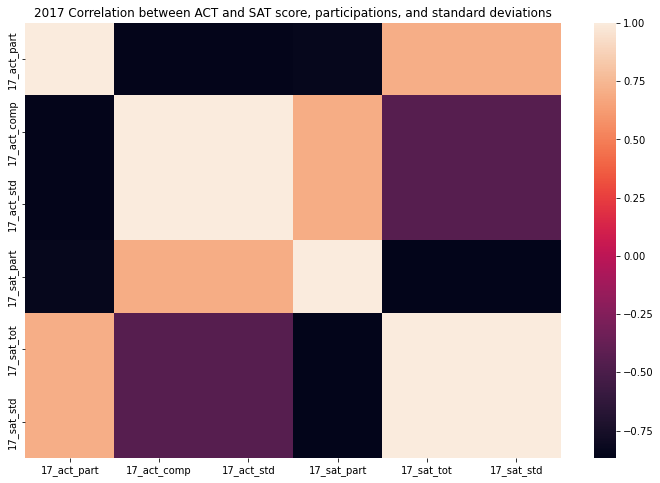

In [97]:
plt.figure(figsize=(12,8))
sns.heatmap(act_sat_17.corr())
plt.title('2017 Correlation between ACT and SAT score, participations, and standard deviations');

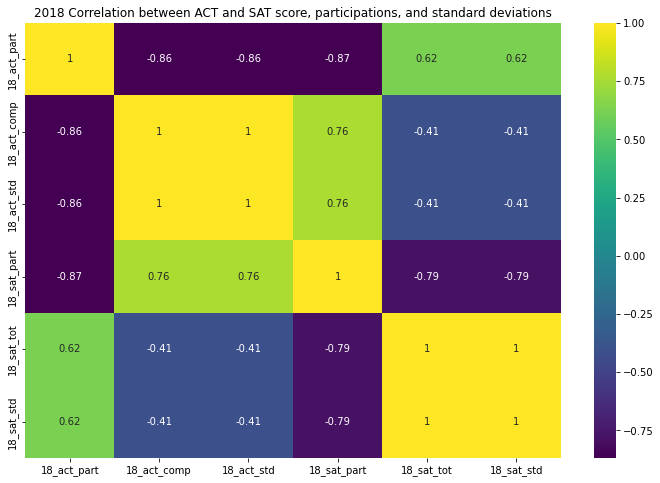

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(act_sat_18.corr(), cmap='viridis', annot=True)
plt.title('2018 Correlation between ACT and SAT score, participations, and standard deviations');

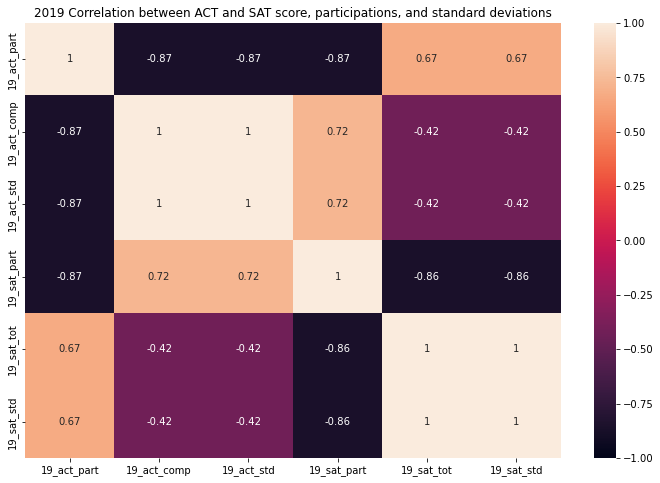

In [101]:
plt.figure(figsize=(12,8))
sns.heatmap(act_sat_19.corr(), vmin=-1, annot=True)
plt.title('2019 Correlation between ACT and SAT score, participations, and standard deviations');

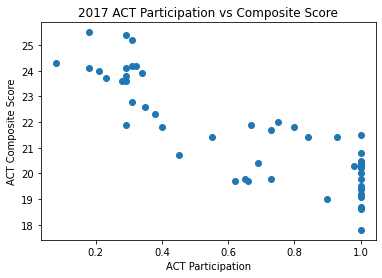

In [102]:
plt.scatter(combined_yoy_act_sat['17_act_part'], combined_yoy_act_sat['17_act_comp'])
plt.xlabel('ACT Participation')
plt.ylabel('ACT Composite Score')
plt.title('2017 ACT Participation vs Composite Score');

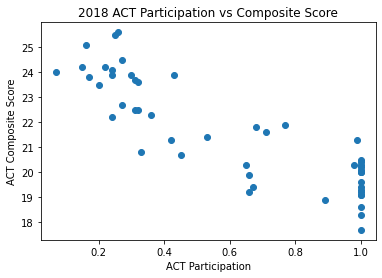

In [103]:
plt.scatter(combined_yoy_act_sat['18_act_part'], combined_yoy_act_sat['18_act_comp'])
plt.xlabel('ACT Participation')
plt.ylabel('ACT Composite Score')
plt.title('2018 ACT Participation vs Composite Score');

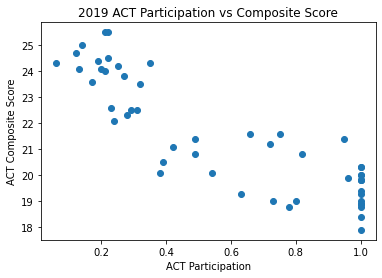

In [104]:
plt.scatter(combined_yoy_act_sat['19_act_part'], combined_yoy_act_sat['19_act_comp'])
plt.xlabel('ACT Participation')
plt.ylabel('ACT Composite Score')
plt.title('2019 ACT Participation vs Composite Score');

*Interpretation*: The above 3 images show that the higher the ACT participation, the lower the ACT composite score

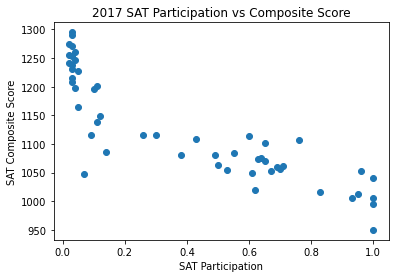

In [105]:
plt.scatter(combined_yoy_act_sat['17_sat_part'], combined_yoy_act_sat['17_sat_tot'])
plt.xlabel('SAT Participation')
plt.ylabel('SAT Composite Score')
plt.title('2017 SAT Participation vs Composite Score');

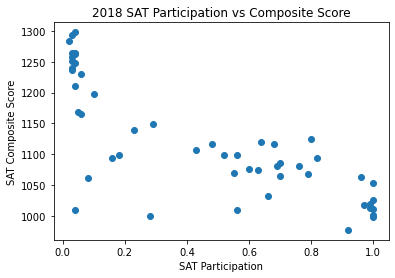

In [106]:
plt.scatter(combined_yoy_act_sat['18_sat_part'], combined_yoy_act_sat['18_sat_tot'])
plt.xlabel('SAT Participation')
plt.ylabel('SAT Composite Score')
plt.title('2018 SAT Participation vs Composite Score');

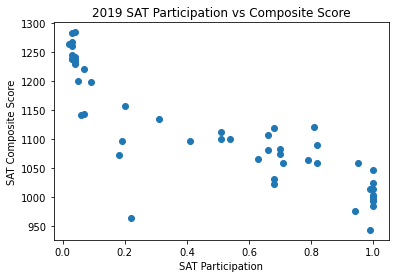

In [107]:
plt.scatter(combined_yoy_act_sat['19_sat_part'], combined_yoy_act_sat['19_sat_tot'])
plt.xlabel('SAT Participation')
plt.ylabel('SAT Composite Score')
plt.title('2019 SAT Participation vs Composite Score');

*Interpretation*: The above 3 images show that the higher the SAT participation, the lower the SAT total score

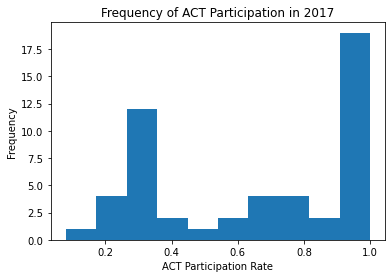

In [108]:
combined_yoy_act_sat['17_act_part'].plot(kind='hist')
plt.xlabel('ACT Participation Rate')
plt.title('Frequency of ACT Participation in 2017');

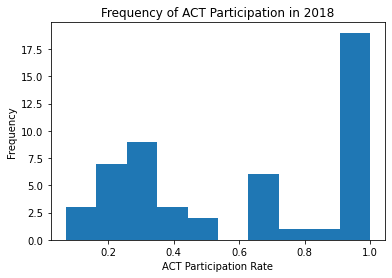

In [109]:
combined_yoy_act_sat['18_act_part'].plot(kind='hist')
plt.xlabel('ACT Participation Rate')
plt.title('Frequency of ACT Participation in 2018');

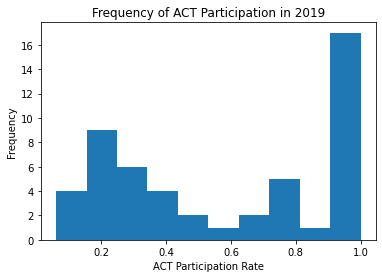

In [110]:
combined_yoy_act_sat['19_act_part'].plot(kind='hist')
plt.xlabel('ACT Participation Rate')
plt.title('Frequency of ACT Participation in 2019');

*Interpretation*: The above 3 images show many states having 100% ACT Participation between 2017 and 2019

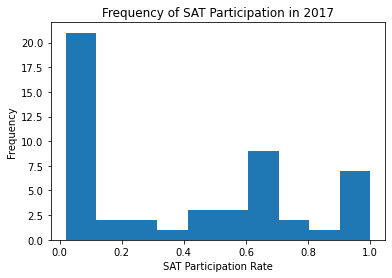

In [111]:
combined_yoy_act_sat['17_sat_part'].plot(kind='hist')
plt.xlabel('SAT Participation Rate')
plt.title('Frequency of SAT Participation in 2017');

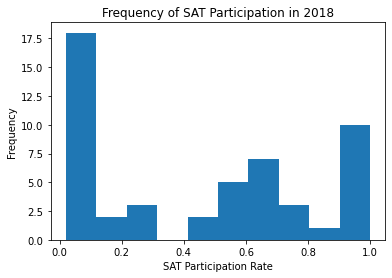

In [112]:
combined_yoy_act_sat['18_sat_part'].plot(kind='hist')
plt.xlabel('SAT Participation Rate')
plt.title('Frequency of SAT Participation in 2018');

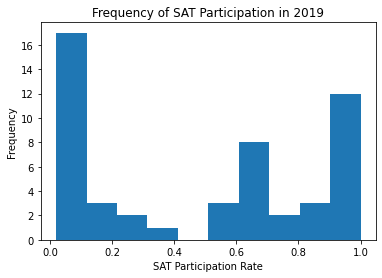

In [113]:
combined_yoy_act_sat['19_sat_part'].plot(kind='hist')
plt.xlabel('SAT Participation Rate')
plt.title('Frequency of SAT Participation in 2019');

*Interpretation*: The above 3 images show many states having less than 20% SAT Participation between 2017 and 2019

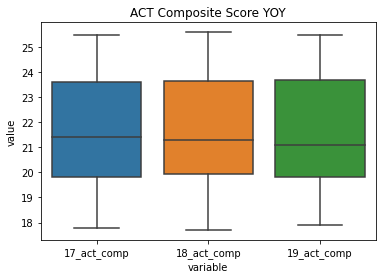

In [114]:
df = pd.DataFrame(data = combined_yoy_act_sat, columns = ['17_act_comp','18_act_comp','19_act_comp'])
sns.boxplot(x= "variable", y="value", data=pd.melt(df))
plt.title("ACT Composite Score YOY");

*Interpretation*: The above image shows a decrease in the average ACT composite score year over year.

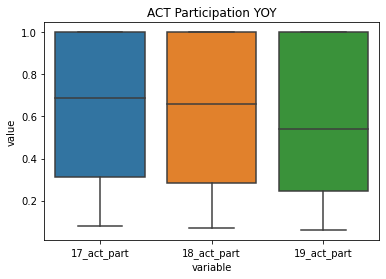

In [115]:
df = pd.DataFrame(data = combined_yoy_act_sat, columns = ['17_act_part','18_act_part','19_act_part'])
sns.boxplot(x= "variable", y="value", data=pd.melt(df))
plt.title("ACT Participation YOY");

*Interpretation*: The above image shows a decrease in ACT participation year over year.

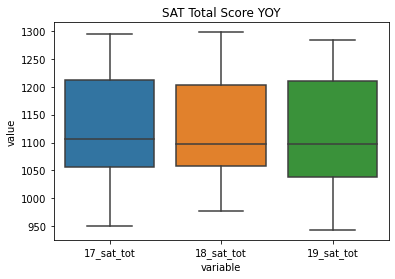

In [116]:
df = pd.DataFrame(data = combined_yoy_act_sat, columns = ['17_sat_tot','18_sat_tot','19_sat_tot'])
sns.boxplot(x= "variable", y="value", data=pd.melt(df))
plt.title("SAT Total Score YOY");

*Interpretation*: The above image shows a decrease in the average SAT total score year over year.

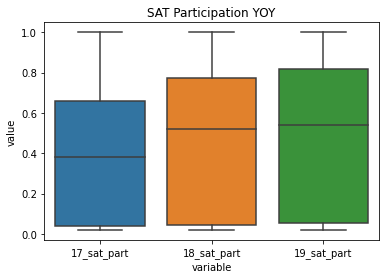

In [117]:
df = pd.DataFrame(data = combined_yoy_act_sat, columns = ['17_sat_part','18_sat_part','19_sat_part'])
sns.boxplot(x= "variable", y="value", data=pd.melt(df))
plt.title("SAT Participation YOY");

*Interpretation*: The above image shows an increase in SAT participation year over year.

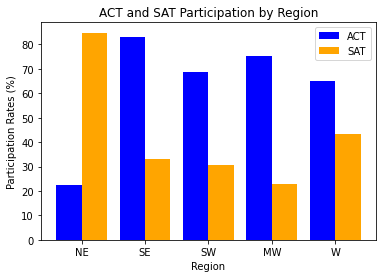

In [118]:
X = ['NE','SE','SW','MW', 'W']
ACT = [22.36,82.92,68.83,75.36,64.82]
SAT = [84.78,33.08,30.67,22.89,43.36]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, ACT, 0.4, label = 'ACT', color='blue')
plt.bar(X_axis + 0.2, SAT, 0.4, label = 'SAT', color='orange')
  
plt.xticks(X_axis, X)
plt.xlabel("Region")
plt.ylabel("Participation Rates (%)")
plt.title("ACT and SAT Participation by Region")
plt.legend()
plt.show()

*Interpretation*: Each region shows a preference for one standardized test over another. In all regions, except NE, the standardized test of choice is the ACT.

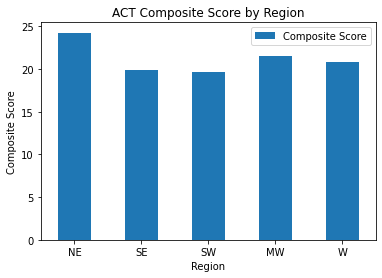

In [119]:
df = pd.DataFrame({'Region':['NE','SE','SW','MW', 'W'], 'Composite Score':[24.25,19.93,19.65,21.55,20.79]})
ax = df.plot.bar(x='Region', y='Composite Score', rot=0)
plt.ylabel("Composite Score")
plt.title("ACT Composite Score by Region");

*Interpretation*: NE and MW are above national average score of 21.49

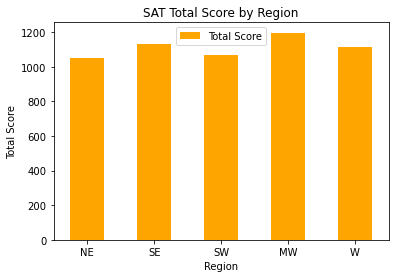

In [120]:
df = pd.DataFrame({'Region':['NE','SE','SW','MW', 'W'], 'Total Score':[1052,1134,1071,1197,1112]})
ax = df.plot.bar(x='Region', y='Total Score', rot=0, color='orange')
plt.ylabel("Total Score")
plt.title("SAT Total Score by Region");

*Interpretation*: SE and MW are above national average score of 1119.73

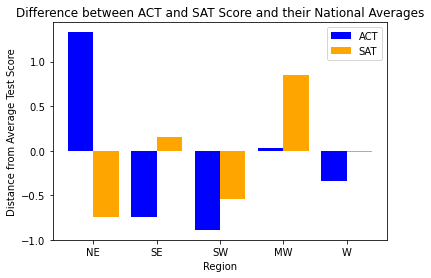

In [121]:
Diff = ['NE','SE','SW','MW', 'W']
ACT = [1.33,-.75,-.89,.03,-.34]
SAT = [-.75,.15,-.54,.85,-.01]
  
Diff_axis = np.arange(len(Diff))
  
plt.bar(Diff_axis - 0.2, ACT, 0.4, label = 'ACT', color='blue')
plt.bar(Diff_axis + 0.2, SAT, 0.4, label = 'SAT', color='orange')
  
plt.xticks(X_axis, X)
plt.xlabel("Region")
plt.ylabel("Distance from Average Test Score")
plt.title("Difference between ACT and SAT Score and their National Averages")
plt.legend()
plt.show()

*Interpretation*: NE and MW do better than national average for ACT; SE and MW do better than national average in SAT.

## Conclusions and Recommendations

**Should high school students take the SAT or ACT?**

It depends! It depends!  One test may better align with their personal strengths and level of knowledge. Although some regions show a strong affinity to one test, it does not correlate with how well they will perform. In fact, the lower the participation of the standardized test, the better that region performs on the exam. This could be for many reasons, one of which may be that those taking the "less popular" exam, are taking it because they took a practice exam or did research on the difference and determined whether they would be more successful at either or took both just in case. 

I recommend that each student take the pre-exam for both the ACT and SAT so that they can determine which test they feel more equipped to take come the official exam. 